# Usage (quickest version)
Thank you for using CovsirPhy!!  
This is the quickest tour to get an overview of CovsirPhy.

- Download datasets
- Parameter estimation with phase-dependent SIR-derived models
- Simulate the number of cases

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.12.0-mu.new.359.362.366.367.fix.360.373.solving.357'

## Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [5]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)

Note:  
Datasets were retrieved via [COVID-19 Data Hub](https://covid19datahub.io/https://covid19datahub.io/) and the citation is  
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

Scenario analysis can be performed for the following countries.

In [6]:
pprint(set(jhu_data.countries()) & set(population_data.countries()), compact=True)

{'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Atlantica', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Grand Princess',
 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
 'Haiti', 'Holy See', 'Honduras', 'Hungary', 

## Start scenario analysis
As an example, we will analysis the number of cases in Italy. Scenario analysis can be performed with `Scenario` class. To initialize this class, we need to specify the country name.

In [7]:
snl = cs.Scenario(jhu_data, population_data, country="Italy")

## Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot.

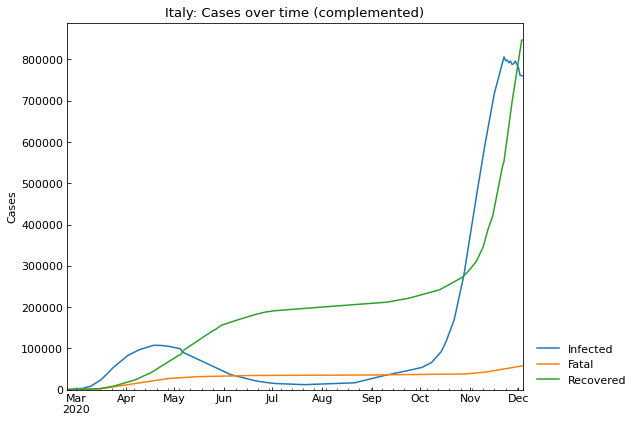

,Date,Confirmed,Infected,Fatal,Recovered
280,2020-11-30,1601554,788471,55576,757507
281,2020-12-01,1620901,779945,56361,784595
282,2020-12-02,1641610,761230,57045,823335
283,2020-12-03,1664829,759982,58038,846809
284,2020-12-04,1664829,759982,58038,846809


In [8]:
df = snl.records()
df.tail()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

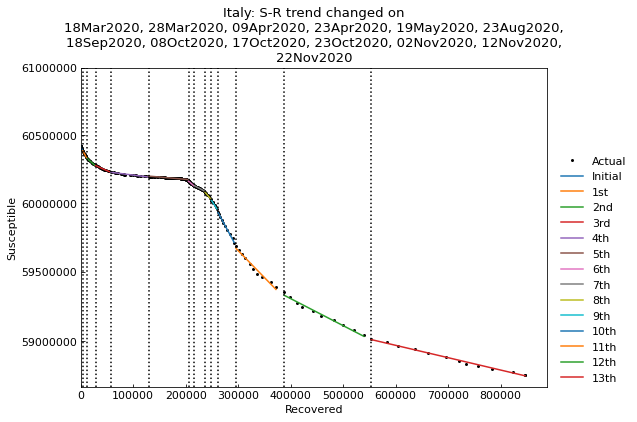

In [9]:
_ = snl.trend()

Summarize the phases.

- Type: "Past" or "Future"
- Start: start date of the phases
- End: end date of the phases
- Population: total population in the phases

In [10]:
snl.summary()

,Type,Start,End,Population
0th,Past,24Feb2020,17Mar2020,60421760
1st,Past,18Mar2020,27Mar2020,60421760
2nd,Past,28Mar2020,08Apr2020,60421760
3rd,Past,09Apr2020,22Apr2020,60421760
4th,Past,23Apr2020,18May2020,60421760
5th,Past,19May2020,22Aug2020,60421760
6th,Past,23Aug2020,17Sep2020,60421760
7th,Past,18Sep2020,07Oct2020,60421760
8th,Past,08Oct2020,16Oct2020,60421760
9th,Past,17Oct2020,22Oct2020,60421760


## Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [11]:
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	11th phase (28Mar2020 - 08Apr2020): finished 2629 trials in 3 min  0 sec


	13th phase (17Oct2020 - 22Oct2020): finished  200 trials in 0 min 10 sec

	 4th phase (08Oct2020 - 16Oct2020): finished  187 trials in 0 min 10 sec

	 3rd phase (24Feb2020 - 17Mar2020): finished 2253 trials in 3 min  1 sec

	 0th phase (02Nov2020 - 11Nov2020): finished 2277 trials in 3 min  0 sec

	 5th phase (19May2020 - 22Aug2020): finished 2211 trials in 3 min  1 sec

	 8th phase (23Oct2020 - 01Nov2020): finished  199 trials in 0 min 10 sec

	 9th phase (12Nov2020 - 21Nov2020): finished 2190 trials in 2 min 50 sec

	 2nd phase (23Aug2020 - 17Sep2020): finished  188 trials in 0 min 10 sec

	10th phase (09Apr2020 - 22Apr2020): finished  168 trials in 0 min 10 sec

	 1st phase (18Sep2020 - 07Oct2020): finished  172 trials in 0 min 10 sec

	 6th phase (18Mar2020 - 27Mar2020): finished 2507 trials in 3 min  1 sec

	 7th phase (22Nov2020 - 04Dec2020): finished 2538 trials in 3 min  1 sec

	12th phase (23Apr2020 - 18May2020): finished 2613 trials in 3 min  1 sec

Completed optimization. Total: 9 min 24 sec


## History of reproduction number
Let's see the history of parameter values. Reproduction number is here.

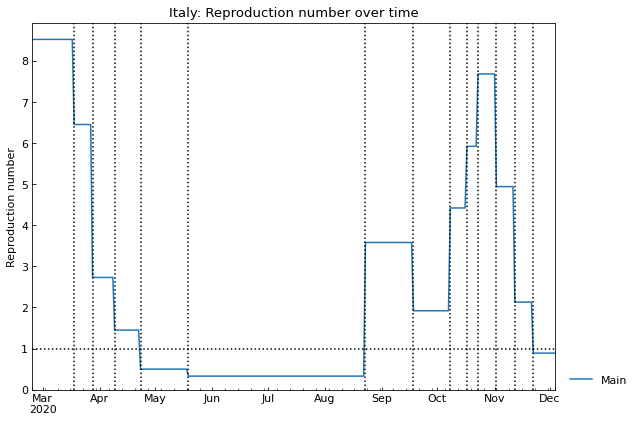

In [12]:
_ = snl.history(target="Rt")

## History of parameters
History of each parameter. Values will be divided by the values in 0th phase.

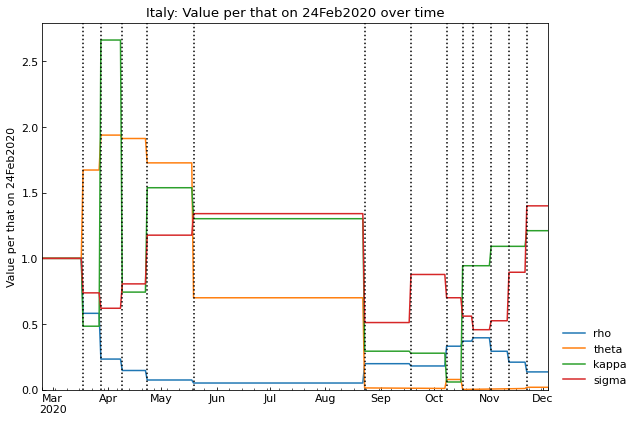

In [13]:
_ = snl.history_rate()

## Simulate the number of cases
How many cases will be in 30 days if the parameter values will not be changed from today?

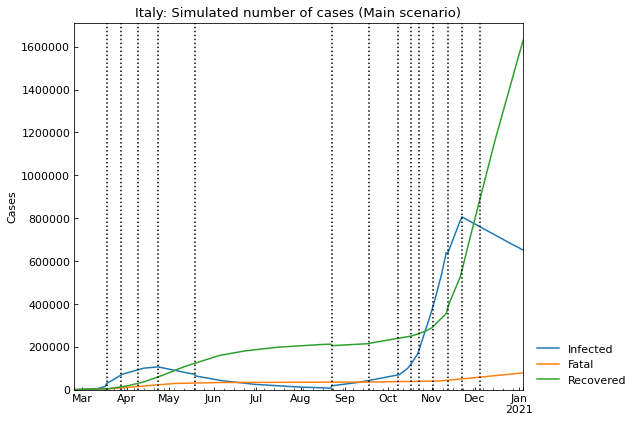

In [14]:
# Add a phase with 30 days from the date of the last record
snl.add(days=30)
_ = snl.simulate()

Next, please see [Usage (quick version)](https://lisphilar.github.io/covid19-sir/usage_quick.html) to find details of datasets and how to perform scenario analysis.  
Thank you!